## Rozwiązywanie równań różniczkowych metodami algebry liniowej 

#### Zadanie 1
Zaimplementuj metodą iteracyjną rozwiązywania układów równań Czebyszewa. 





In [79]:
import numpy as np
from scipy.linalg import norm

def chebyshev(A, B,numberOfIterations, lMax, lMin):
    d = (lMax + lMin) / 2
    c = (lMax - lMin) / 2
    x = np.zeros_like(B)
    r = B - np.matmul(A, x)

    for i in range(1, numberOfIterations + 1):
        z = np.linalg.solve(A, r)
        alpha = 1
        if i == 1:
            p = z
            alpha = 1 / d
        elif i == 2:
            beta = 0.5 * (c * alpha) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        else:
            beta = (c * alpha / 2) ** 2
            alpha = 1 / (d - beta / alpha)
            p = z + beta * p
        x = x + alpha * p
        r = np.matmul(A, x)
        r = B - r
        if norm(r) < 1e-10:
            return x, i
    return x, numberOfIterations

#### Zadanie 2
Zapoznaj się z prezentacją dr Rycerz o sposobie rozwiązywaniu równania różniczkowego Poissona dla dwóch wymiarów (metoda różnic skończonych).

Rozwiąż równanie Poissona w przestrzeni 2D. Funkcja rozkładu źródeł ma postać: $$\rho(x,y) = \frac{x+y}{2}$$    
Obliczenia dokonujemy w obszarze dwuwymiarowym: $$\Omega = [0,10] \times [0,10]$$ Siatkę proszę dobrać samodzielnie tak by obliczenie nie było zbyt długie (na podstawie wcześniejszy testów metod iteracyjnych).   
Warunki brzegowe jednorodne Dirichleta: 0 na brzegach. 

Przedstaw sposób konstrukcji układu równań w metodzie różnic skończonych dla tego równiania. Przedstaw rozwiązanie graficznie.
### Rozwiązanie

Równanie ma postać :

$\nabla^{2}\varphi(x,y) = -     \rho(x,y)$,gdzie:  

* $\rho(x,y)$ - funkcja rozkładu źródeł (dana w zadaniu),

* $\nabla^{2}$ - operator Laplace'a

Równanie może być zapisane inaczej jako:
$\frac{\partial^{2}*\varphi(x,y)}{\partial*x^{2}}$ + $\frac{\partial^{2}*\varphi(x,y)}{\partial*y^{2}} = -\rho(x,y)$

Zakładamy jednorodne warunki brzegowe Dirichleta: 0 na brzegach:  
* $\varphi(0,y)$ = 0,   
* $\varphi(n+1,y)$ = 0,  
* $\varphi(x,0)$ = 0,  
* $\varphi(x,n+1)$ = 0

następnie za pomocą metody różnic skończonych przybliżamy pochodne:

Wprowadzamy siatkę 10x10:  

$\varphi_{i, j} = \varphi(x_{i}, y_{j}), i = 1,...10, j = 1,...10 $, $(x_{i}, y_{j})$ - punkty na siatce,
h = 1 - odstęp między punktami

Wyliczamy potrzebne pochodne:
* $\frac{\partial*\varphi_{i,j}}{\partial*x} = \frac{\varphi_{i+1,j}-\varphi_{i-1,j}}{2h} + O(h^{2})$   
* $\frac{\partial^{2}*\varphi_{i,j}}{\partial*x^{2}} = \frac{\varphi_{i+1,j}-2*\varphi_{i,j}+\varphi_{i-1,j}}{h^{2}} + O(h^{2})$  
* $\frac{\partial*\varphi_{i,j}}{\partial*y} = \frac{\varphi_{i,j+1}-\varphi_{i,j-1}}{2h} + O(h^{2})$  
* $ \frac{\partial^{2}*\varphi_{i,j}}{\partial*y^{2}} = \frac{\varphi_{i,j+1}-2*\varphi_{i,j}+\varphi_{i,j-1}}{h^{2}} + O(h^{2})$

Następnie, po podstawieniu równań i skróceniu otrzymujemy postać :

 $\frac{\varphi(x_{i}, y_{j-1}) + \varphi(x_{i-1}, y_{j}) - 4*\varphi(x_{i}, y_{j}) + \varphi(x_{i+1}, y_{j}) + \varphi(x_{i}, y_{j+1})}{h^{2}} = -\rho(x,y)$

Dla każego z punktów $(x_{i}, y_{j})$ równanie jest zależne od czterech punktów oddalonych o h: $(x_{i+1}, y_{j})$, $(x_{i-1}, y_{j})$, $(x_{i}, y_{j+1})$, $(x_{i}, y_{j-1})$

Macierz A
[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]

 Wektor B
[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  1.5  2.   2.5  3.
  3.5  4.   4.5  5.   5.5  6.   2.   2.5  3.   3.5  4.   4.5  5.   5.5
  6.   6.5  2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7.   7.5  3.5  4.   4.5  5.   5.5  6.
  6.5  7.   7.5  8.   4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5  9.   5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5  5.5  6.   6.5  7.   7.5  8.   8.5  9.
  9.5 10. ] 

Rozwiązania znalezione przy pomocy metody Czebyszewa :

 Ilość iteracji : 1 

| Unknown   |    Value | Unknown   |    Value | Unknown   |    Value | Unknown   |    Value |
|:----------|---------:|:----------|---------:|:----------|---------:|:----------|---------:|
| x0        |

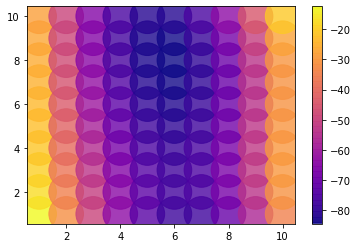

In [91]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from itertools import repeat
from tabulate import tabulate

def generateA(matrixDegree):
    
    A = np.zeros((matrixDegree**2, matrixDegree**2))
    for i in range(matrixDegree**2):
        
        A[i][i] = -4
        if i - 1 >= 0: 
            A[i-1][i] = 1.0
        if i + 1 < matrixDegree**2: 
            A[i+1][i] = 1.0
        if i - matrixDegree >= 0: 
            A[i-matrixDegree][i] = 1.0
        if i + matrixDegree < matrixDegree**2: 
            A[i+matrixDegree][i] = 1.0
    return A

def generateB(matrixDegree):
    B = np.zeros(matrixDegree ** 2)
    k = 0
    for i in range(1, matrixDegree + 1):
        for j in range(1, matrixDegree + 1):
            B[k] = (lambda x, y: (x + y) / float(2))(j, i)
            k += 1
    return B
   
def display(n,A,B):
    x_res,iterations = chebyshev(A, B, 1000, 0, 2)
    x, y = [], []
    
    #Getting axes
    for i in range(1, n+1):
        x.extend(repeat(i,n))
        for j in range(1, n+1):
            y.append(j)
    
    #Drawing chart
    plt.scatter(x, y, c=x_res, sizes=[1200 for i in range(pow(n,2))], alpha=0.8, cmap='plasma', marker='o')
    plt.colorbar()
    plt.show()
    

def showValuesInColumns(maxValuesInColumn,matrixDegree,x,numberOfIterations):
    print("\n","Ilość iteracji :",numberOfIterations,"\n")
    result=[]
    for i in range(0,matrixDegree*matrixDegree):
        if(i<maxValuesInColumn): 
            result.append(['x'+str(i),x[i]]) 
        if(i>=maxValuesInColumn):
            result[i%maxValuesInColumn].append('x'+str(i))
            result[i%maxValuesInColumn].append(x[i])
    columns=[]
    for i in range(0,int(matrixDegree*matrixDegree/maxValuesInColumn)):
        columns.append('Unknown')
        columns.append('Value')
    print(tabulate(result, headers=columns,tablefmt='pipe'))
    print()
    
def printShow(matrixDegree):
    A = generateA(matrixDegree)
    B = generateB(matrixDegree)
    x, i = chebyshev(A, B, 1000, 0, 2)
    print("Macierz A")
    print(A)
    print("\n","Wektor B")
    print(B,"\n")
    print("Rozwiązania znalezione przy pomocy metody Czebyszewa :")
    maxValuesInColumn=25
    showValuesInColumns(maxValuesInColumn,matrixDegree,x,i)
    print("Chart:",)
    display(matrixDegree,A,B)

printShow(10)

#### Zadanie 3
Zastosuj do otrzymanego układu równań metody Gaussa-Seidla, SOR i Czebyszewa. Porównaj zbieżność tych metod. 


In [92]:
def gaussaSeidla(A,B,numberOfIterations):
    x = np.zeros_like(B)
    
    for it_count in range(numberOfIterations):
        x_new = np.zeros_like(x)
        
        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (B[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, rtol=1e-8):
            return x_new,it_count
        x = x_new


def overRelaxation(A, B, omega,numberOfIterations):
    x_new = np.zeros_like(B)
    residual = np.linalg.norm(np.matmul(A, x_new) - B) #Initializacja 
    for k in range(numberOfIterations):
        for i in range(A.shape[0]):
            sigma = 0
            for j in range(A.shape[1]):
                if j != i:
                    sigma += A[i][j] * x_new[j]
            x_new[i] = (1 - omega) * x_new[i] + (omega / A[i][i]) * (B[i] - sigma)
        residual = np.linalg.norm(np.matmul(A, x_new) - B)
        if residual < 1e-8:
            return x_new,k
    return x_new,numberOfIterations

def compareIterations(matrixDegree,maxIterations,omega):
    A = generateA(matrixDegree)
    B = generateB(matrixDegree)
    valuesInColumn=25
    
    #Chebyshev
    x,i=chebyshev(A,B,maxIterations,0,2)
    print("Metoda Czebyszewa")
    showValuesInColumns(valuesInColumn,matrixDegree,x,i)
    
    #Gauss-Seidl
    x,i=gaussaSeidla(A, B, maxIterations)
    print("Metoda Gaussa-Seidla")
    showValuesInColumns(valuesInColumn,matrixDegree,x,i)
    
    #SOR
    x,i=overRelaxation(A,B,omega,maxIterations)
    print("Metoda kolejnych nadrelaksacji")
    showValuesInColumns(valuesInColumn,matrixDegree,x,i)

compareIterations(10,1000,1.5)  

Metoda Czebyszewa

 Ilość iteracji : 1 

| Unknown   |    Value | Unknown   |    Value | Unknown   |    Value | Unknown   |    Value |
|:----------|---------:|:----------|---------:|:----------|---------:|:----------|---------:|
| x0        | -12.3806 | x25       | -60.3035 | x50       | -78.3102 | x75       | -69.6348 |
| x1        | -16.9602 | x26       | -62.4497 | x51       | -77.028  | x76       | -70.3269 |
| x2        | -19.2917 | x27       | -64.1416 | x52       | -77.2964 | x77       | -69.9843 |
| x3        | -20.9357 | x28       | -65.1492 | x53       | -78.5901 | x78       | -67.9427 |
| x4        | -22.344  | x29       | -65.1579 | x54       | -80.4154 | x79       | -63.5642 |
| x5        | -23.6346 | x30       | -63.6181 | x55       | -82.3106 | x80       | -56.73   |
| x6        | -24.8216 | x31       | -63.9871 | x56       | -83.8303 | x81       | -53.2643 |
| x7        | -25.9052 | x32       | -65.4939 | x57       | -84.5331 | x82       | -52.0729 |
| x8        | -26.9

#### Wniosek
Możemy zrobić wniosek że metoda Czebyszewa potrzebuje najmniejszą ilość iteracji tylko **jedną**. Metoda Gaussa-Seidla potrzebuje w setki raz więcej **366**. SOR jest w tym planie wygodnięjsza **169**.